5


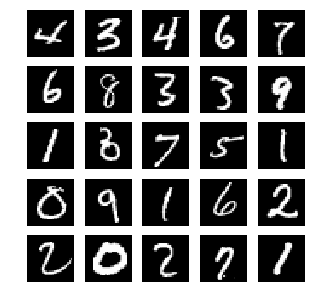

In [43]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print (y_train[0])

#unique, counts = np.unique(y_train, return_counts=True)
#print("Train lables: ", dict(zip(unique, counts)))

#unique, counts = np.unique(y_test, return_counts=True)
#print ("Test lables: ", dict(zip(unique, counts)))

indexs = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexs]
#labels = y_train[indexs]

plt.figure(figsize=(5,5))
for i in range(len(indexs)):
    plt.subplot(5,5,i+1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()


In [0]:
plt.close('all')

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

In [46]:
#number of labels

num_labels = len(np.unique(y_train))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

image_size = x_train.shape[1]
flat_size = image_size*image_size

x_train = np.reshape(x_train, [-1, flat_size])
x_train = x_train.astype('float')/255.0

x_test = np.reshape(x_test, [-1, flat_size])
x_test = x_test.astype('float')/255.0

batch_size = 128
hidden_units = 256
dropout = 0.4

model = Sequential()

model.add(Dense(hidden_units, input_dim=flat_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

plot_model(model, show_shapes=True)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
__________

In [47]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20, batch_size=batch_size)
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)

print('Accuracy = ', acc)

W0812 10:13:35.346741 140251727193984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0812 10:13:35.386690 140251727193984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0812 10:13:35.508147 140251727193984 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.3924 - acc: 0.8794
Epoch 2/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.1749 - acc: 0.9488
Epoch 3/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.1337 - acc: 0.9600
Epoch 4/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.1130 - acc: 0.9661
Epoch 5/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.1013 - acc: 0.9687
Epoch 6/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0884 - acc: 0.9723
Epoch 7/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0825 - acc: 0.9742
Epoch 8/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0738 - acc: 0.9768
Epoch 9/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0721 - acc: 0.9774
Epoch 10/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0670 - acc: 0.979